In [ ]:
import pandas as pd
import numpy as np
iris = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/iris.csv')

In [ ]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
from sklearn import model_selection
#split 20% test 80% training
iris_train,iris_test = model_selection.train_test_split(iris,test_size=0.2)
print("Shape of the original iris data: ", iris.shape)
print("Shape of the iris train data = ", iris_train.shape)
print("Shape of the iris test data = ", iris_test.shape)
#Resetting index for prediction time
iris_train = iris_train.reset_index(drop=True)
iris_test = iris_test.reset_index(drop=True)

Shape of the original iris data:  (150, 5)
Shape of the iris train data =  (120, 5)
Shape of the iris test data =  (30, 5)


In [ ]:
#remove low variance features

iris_features = iris.drop('variety', axis=1)

from sklearn.feature_selection import VarianceThreshold

iris_var = VarianceThreshold()

# Perform variance thresholding
iris_var.fit_transform(iris_features)

# Print the name and variance of each feature
for feature in zip(iris_features.columns, iris_var.variances_):
    print(feature)

('sepal.length', 0.6811222222222223)
('sepal.width', 0.1887128888888889)
('petal.length', 3.0955026666666665)
('petal.width', 0.5771328888888888)


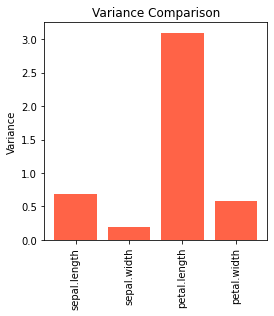

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,4))
plt.bar(x=iris_features.columns, height=iris_var.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

In [ ]:
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold(threshold=0.2)

iris_features_new = selector.fit_transform(iris_features)

# Print the results
print('Number of features before variance thresholding: {}'.format(iris_features.shape[1]))
print('Number of features after variance thresholding: {}'.format(iris_features_new.shape[1]))

Number of features before variance thresholding: 4
Number of features after variance thresholding: 3


In [ ]:
iris_features.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
m = pd.DataFrame(iris_features_new)
m

,0,1,2
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [ ]:

#define input and predict to columns
iris_features = ['sepal.length', 'petal.length', 'petal.width']
iris_labels = ['variety']

print('IRIS DATASET')
print("Features - " + str(iris_features))
print("Labels - " + str(iris_labels))

iris_train_features = iris_train[iris_features]
iris_train_label = iris_train[iris_labels]
print('✔ Train data split into features and labels')

iris_test_features = iris_test[iris_features]
iris_test_label = iris_test[iris_labels]
print('✔ Test data split into features and labels')

IRIS DATASET
Features - ['sepal.length', 'petal.length', 'petal.width']
Labels - ['variety']
✔ Train data split into features and labels
✔ Test data split into features and labels


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# create the model object
dt = DecisionTreeClassifier(max_depth=3) # max-depth controls the maximum depth of the tree

# fit the model on train data
dt.fit(iris_train_features, iris_train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

#Predictions on the Test data
predictions_dt = dt.predict(iris_test_features)

#Putting the above predictions and probabilities together to create a readable df
iris_pred_label = pd.DataFrame(predictions_dt.reshape(len(predictions_dt),1))
iris_pred_label.rename(columns={0:'dt_prediction'}, inplace=True)
iris_pred_label.head(5)

,dt_prediction
0,Versicolor
1,Setosa
2,Versicolor
3,Setosa
4,Virginica


In [ ]:

#Concat the predictions of linear regression to the test dataset
iris_test_pred = pd.concat([iris_test_label, iris_pred_label], axis=1)
iris_test_pred.head()

,variety,dt_prediction
0,Versicolor,Versicolor
1,Setosa,Setosa
2,Versicolor,Versicolor
3,Setosa,Setosa
4,Virginica,Virginica


In [ ]:
from sklearn import metrics
import seaborn as sns
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(iris_test_label, iris_pred_label)*100.0, "%")

accuracy is 93.33333333333333 %


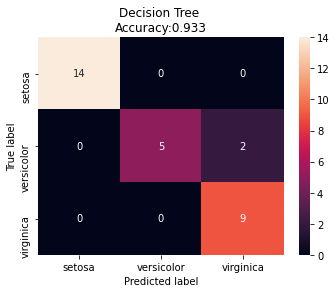

In [ ]:
# Creates a confusion matrix
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(iris_test_label, iris_pred_label) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(iris_test_label, iris_pred_label)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

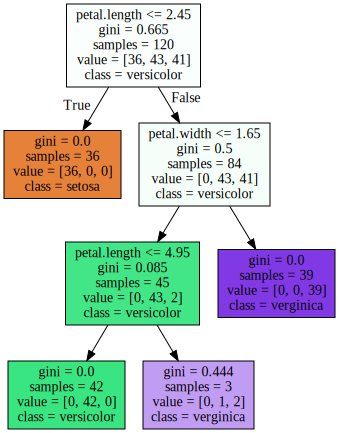

In [ ]:

from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=iris_features,  
                                class_names=['setosa', 'versicolor', 'verginica'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph